# TFM Master BigData

## 1. Cargamos las librerías necesarias

En primer lugar cargamos todas las librerías que vamos a utilizar. 

In [1]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics


# Metricas de evaluación
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier 

#Using a random seed for reproducibility
#The answer to life, universe and everything is 42
import numpy as np
np.random.seed(42)

## 2. Cargar la Data 

Procedemos a leer el dataset que esta en una excel. Es importante resalta que debemos instalar la libreria ```xlrd``` para que el metodo ```read_excel``` este disponible.

In [2]:
#Cargar la Librería
import pandas as pd

#Cargar los datos de excel al Dataset
df =pd.read_excel('DATA.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88828 entries, 0 to 88827
Data columns (total 19 columns):
Día del mes                        88828 non-null int64
Día de la semana                   88828 non-null object
Mes                                88828 non-null object
Año                                88828 non-null int64
Rango de hora                      88828 non-null object
Provincia                          88828 non-null object
Municipio                          88828 non-null object
Municipio o distrito municipal     88828 non-null object
Barrio                             88828 non-null object
Zona                               88828 non-null object
Lugar o sitio de ocurrencia        88828 non-null object
Sexo victima                       88828 non-null object
Edad victima                       88828 non-null object
Grupos de edad victimas            88828 non-null object
nacionalidad victima               88828 non-null object
tipo de delito                     888

In [4]:
#Poner nombres sin espacios a las columnas
df.columns = ['Dia','NombreDia','Mes','Anio','Hora','Provincia','Municipio','Distrito','Barrio','Zona',
              'Sitioocurrencia','Sexovictima','Edadvictima','Grupoedadvictimas','Nacionalidadvictima',
              'Tipodelito','Sexovictimario','Edadvictimario','Gruposedadvictimario']

In [5]:
df.head()

,Dia,NombreDia,Mes,Anio,Hora,Provincia,Municipio,Distrito,Barrio,Zona,Sitioocurrencia,Sexovictima,Edadvictima,Grupoedadvictimas,Nacionalidadvictima,Tipodelito,Sexovictimario,Edadvictimario,Gruposedadvictimario
0,13,Lunes,Junio,2016,04:01-06:00,Distrito Nacional,Santo Domingo de Guzmán,Santo Domingo de Guzmán,Los Ríos,Urbana,Vivienda / domicilio o residencia y sus parqueos,Hombre,56,55 - 59,extranjero,atracos,Hombre,Sin información,Sin información
1,9,Viernes,Diciembre,2011,20:01-22:00,Santo Domingo,Santo Domingo Este,Santo Domingo Este,Alma Rosa,Urbana,Vía pública / parque / interior de vehículo,Hombre,48,45 - 49,extranjero,atracos,Hombre,Sin información,Sin información
2,10,Domingo,Octubre,2010,12:01-14:00,Santo Domingo,Pedro Brand,La Guáyiga,Yacó,Rural,Vía pública / parque / interior de vehículo,Hombre,58,55 - 59,extranjero,atracos,Hombre,Sin información,Sin información
3,1,Domingo,Enero,2017,22:01-24:00,Distrito Nacional,Santo Domingo de Guzmán,Santo Domingo de Guzmán,San Carlos,Urbana,Vía pública / parque / interior de vehículo,Hombre,Sin información,Sin información,extranjero,vandalismo,Hombre,Sin información,Sin información
4,14,Lunes,Octubre,2013,22:01-24:00,Distrito Nacional,Santo Domingo de Guzmán,Santo Domingo de Guzmán,Bella Vista,Urbana,Negocio / comercio / mercado / hostelería / af...,Hombre,44,40 - 44,extranjero,robos,Hombre,Sin información,Sin información


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88828 entries, 0 to 88827
Data columns (total 19 columns):
Dia                     88828 non-null int64
NombreDia               88828 non-null object
Mes                     88828 non-null object
Anio                    88828 non-null int64
Hora                    88828 non-null object
Provincia               88828 non-null object
Municipio               88828 non-null object
Distrito                88828 non-null object
Barrio                  88828 non-null object
Zona                    88828 non-null object
Sitioocurrencia         88828 non-null object
Sexovictima             88828 non-null object
Edadvictima             88828 non-null object
Grupoedadvictimas       88828 non-null object
Nacionalidadvictima     88828 non-null object
Tipodelito              88828 non-null object
Sexovictimario          88828 non-null object
Edadvictimario          24484 non-null object
Gruposedadvictimario    24488 non-null object
dtypes: int64(2), o

## 3. Análisis exploratorio

Analizaremos los datos para sacar algunas conclusiones previas. 
Vamos examinarla en términos de máximos, mínimos, medias y percentiles a través de la función ```describe()```. 

### 3.1 - Vista inicial

In [7]:
df.describe()

,Dia,Anio
count,88828.000000,88828.000000
mean,15.561174,2014.283109
std,8.860904,1.928450
min,1.000000,2010.000000
25%,8.000000,2013.000000
50%,15.000000,2014.000000
75%,23.000000,2016.000000
max,31.000000,2017.000000


### 3.2 Tratamiento de los valores *missing*

Comprobamos si existen valores nulos en el dataset. 

In [8]:
#Identificar las columnas que tienen valores vacios
df.isnull().sum().reset_index()

,index,0
0,Dia,0
1,NombreDia,0
2,Mes,0
3,Anio,0
4,Hora,0
5,Provincia,0
6,Municipio,0
7,Distrito,0
8,Barrio,0
9,Zona,0


In [9]:
#las 2 ultimas columnas tienen muchos nulos mejor las removemos
df = df.drop(['Edadvictimario','Gruposedadvictimario','Grupoedadvictimas'  ],axis=1)

### 3.3 Inspeccionar todas las variables

De esta forma tendremos un mejor conocimiento de que es cada varible y asi podremos corregir cualquier error o quitarla si no nos interesa.

*Tambien procederemos a arreglar lo errores encontrados*

[Text(0, 0.5, 'Cantidad de delitos'), Text(0.5, 0, 'Tipo de delito')]

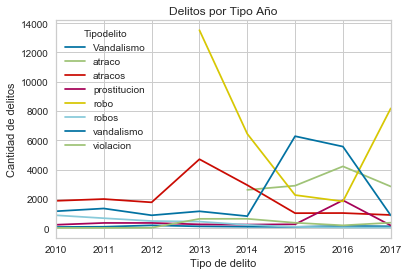

In [10]:
#Graficar Delitos por Tipo Agrupado por año
df_plot = df.groupby(['Anio', 
                      'Tipodelito']).size().reset_index().pivot(columns='Tipodelito', 
                                                                 index='Anio', values=0)

ax =df_plot.plot(kind='line'
                 ,title='Delitos por Tipo Año')
ax.set(ylabel='Cantidad de delitos', xlabel='Tipo de delito') 

#### NombreDia

In [13]:
df[['NombreDia']].groupby('NombreDia').size()

NombreDia
Domingo      15512
Jueves       11188
Lunes        13904
Martes       11072
Miércoles    11504
Sábado       13336
Viernes      12312
dtype: int64

In [14]:
df['NombreDia'].unique()

array(['Lunes', 'Viernes', 'Domingo', 'Miércoles', 'Jueves', 'Martes',
       'Sábado'], dtype=object)

Todo se ve bien con esta variable, no tenemos que hacerle nada.

#### Revisar Hora

In [18]:
df[['Hora']].groupby('Hora').size()

Hora
00:01-02:00         6916
02:01-04:00         6092
04:01-06:00         4296
06:01-08:00         4880
08:01-10:00         7640
10:01-12:00         9552
12:01-14:00         6816
14:01-16:00         5280
16:01-18:00         4764
18:01-20:00         6600
20:01-22:00        19241
22:01-24:00         6712
Sin información       39
dtype: int64

In [19]:
#Remover los que no tienen hora = 'Sin información'
df=df[df.Hora != 'Sin información']

#### Verificar la variable Mes

In [23]:
df['Mes'].unique()

array(['Junio', 'Diciembre', 'Octubre', 'Enero', 'Abril', 'Septiembre',
       'Mayo', 'Noviembre', 'Agosto', 'Marzo', 'Febrero', 'Julio'],
      dtype=object)

#### Edad Victima

In [24]:
#Identificar las distintas edades que tenemos en la data.
df[['Edadvictima']].groupby('Edadvictima').size()

Edadvictima
0                     56
1                     20
2                     20
3                     20
4                     32
                   ...  
90                     4
92                     4
93                     4
96                     4
Sin información    51037
Length: 89, dtype: int64

In [25]:
#Remover las edades ya que la mayoria de los datos no tienen esta informacion.
df = df.drop(['Edadvictima'  ],axis=1)

#### Revisar Barrios y demas parte de la direccion

In [26]:
#Ver los barrios
df[['Barrio']].head()
print("Cantidad de Barrios diferentes: " + str(len(df['Barrio'].unique())))

Cantidad de Barrios diferentes: 201


In [27]:
#Ver los distintos varrios
df.groupby(['Barrio']).size()

Barrio
9999999999                    4
24 de Abril                 192
30  de Mayo                 188
Aeropuerto Internacional      4
Alameda                     176
                           ... 
Villa Morada                 12
Villas Agrícolas            964
Vista Verde                  20
Yacó                         12
Zona Industrial Herrera      68
Length: 201, dtype: int64

In [28]:
#Si el BARRIO esta 'Sin informacion' ponerle el Distrito.
df['Barrio'] = df.apply(lambda row : row['Distrito'] if  row['Barrio']=='Sin información' else row['Barrio'],axis=1)

In [29]:
#Distritos incorrectos
df['Distrito'] =df['Distrito'].replace({"San Luís":"Santo Domingo Este"})

condicion=(df.Distrito == 'Santo Domingo Este') & (df.Barrio == 'Manoguayabo(ZR)')
df.loc[condicion,'Distrito']="Santo Domingo Oeste"

condicion=(df.Distrito =='Santo Domingo de Guzmán') & (df.Barrio == 'Manoguayabo(ZU)')
df.loc[condicion,'Distrito']="Santo Domingo Oeste"

condicion=(df.Distrito =='Santo Domingo de Guzmán') & (df.Barrio == 'Mendoza(ZU)')
df.loc[condicion,'Distrito']="Santo Domingo Este"

condicion=(df.Distrito =='Santo Domingo Este') & (df.Barrio == 'Bayona')
df.loc[condicion,'Distrito']="Santo Domingo Oeste"

condicion=(df.Distrito =='Santo Domingo de Guzmán') & (df.Barrio == 'Cancino Adentro')
df.loc[condicion,'Distrito']="Santo Domingo Oeste"

condicion=(df.Distrito =='La Caleta') & (df.Barrio == 'Boca Chica')
df.loc[condicion,'Distrito']='Boca Chica'

#Distrito y Municipio incorrecto
condicion=(df.Distrito =='Santo Domingo Este') & (df.Barrio == 'Sabana Perdida')
df.loc[condicion,'Distrito']='Santo Domingo Norte'
df.loc[condicion,'Municipio']='Santo Domingo Norte'

#Barrios Incorrectos
condicion=(df.Distrito =='Santo Domingo de Guzmán') & (df.Barrio == 'La Fe')
df.loc[condicion,'Barrio']="Ensanche La Fe"

condicion=(df.Distrito =='Los Alcarrizos') & (df.Barrio == 'Pueblo Nuevo')
df.loc[condicion,'Barrio']="Barrio Pueblo Nuevo"

condicion=(df.Distrito =='Los Alcarrizos') & (df.Barrio == 'Paraíso')
df.loc[condicion,'Barrio']="Barrio Paraíso"

condicion=(df.Distrito =='Los Alcarrizos') & (df.Barrio == 'La Fe')
df.loc[condicion,'Barrio']="Barrio La Fe"

condicion=(df.Distrito =='San Antonio de Guerra') & (df.Barrio == 'Boca Chica')
df.loc[condicion,'Barrio']='San Antonio de Guerra'

condicion=(df.Municipio =='Boca Chica') & (df.Barrio == 'Guerra Centro')
df.loc[condicion,'Barrio']="Boca Chica"

condicion=(df.Distrito =='La Guáyiga') & (df.Barrio == 'Pedro Brand')
df.loc[condicion,'Barrio']="La Guáyiga"

condicion=(df.Municipio =='San Antonio de Guerra') & (df.Barrio == 'Guerra Centro')
df.loc[condicion,'Barrio']="San Antonio de Guerra"

condicion=(df.Municipio =='Santo Domingo Este') & (df.Barrio == 'Ciudad Colonial')
df.loc[condicion,'Barrio']="Santo Domingo Este"

condicion=(df.Municipio =='Santo Domingo Este') & (df.Barrio == 'Manoguayabo(ZR)')
df.loc[condicion,'Barrio']="Santo Domingo Este"

condicion=(df.Municipio =='Santo Domingo Este') & (df.Barrio == 'Mendoza(ZU)')
df.loc[condicion,'Barrio']="Mendoza"

condicion=(df.Municipio =='Santo Domingo Oeste') & (df.Barrio == 'Manoguayabo(ZR)')
df.loc[condicion,'Barrio']="Manoguayabo"

condicion=(df.Municipio =='Santo Domingo de Guzmán') & (df.Barrio == 'Mendoza(ZU)')
df.loc[condicion,'Barrio']="Santo Domingo de Guzmán"


In [30]:
#Distritos y Municipios incorrectos
condicion=(df.Distrito =='Santo Domingo de Guzmán') & (df.Municipio == 'Santo Domingo de Guzmán') 
& (df.Barrio == 'Alameda') 
df.loc[condicion,'Distrito']='Santo Domingo Oeste'
df.loc[condicion,'Municipio']='Santo Domingo Oeste'


condicion=(df.Distrito =='Santo Domingo Oeste') & (df.Municipio == 'Santo Domingo Este') & (df.Barrio == 'Bayona') 
df.loc[condicion,'Distrito']='Santo Domingo Oeste'
df.loc[condicion,'Municipio']='Santo Domingo Oeste'


condicion=(df.Distrito =='San Antonio de Guerra') & (df.Municipio == 'San Antonio de Guerra') 
& (df.Barrio == 'Bella Vista') 
df.loc[condicion,'Distrito']='Santo Domingo de Guzmán'
df.loc[condicion,'Municipio']='Santo Domingo de Guzmán'


condicion=(df.Distrito =='Santo Domingo Norte') & (df.Municipio == 'Santo Domingo Norte') 
& (df.Barrio == 'Hacienda Estrella') 
df.loc[condicion,'Distrito']='La Victoria'
df.loc[condicion,'Municipio']='Santo Domingo Norte'


condicion=(df.Distrito =='Santo Domingo Este') & (df.Municipio == 'Santo Domingo Este') 
& (df.Barrio == 'Juan Pablo Duarte') 
df.loc[condicion,'Distrito']='Santo Domingo Oeste'
df.loc[condicion,'Municipio']='Santo Domingo Oeste'


condicion=(df.Distrito =='Pedro Brand') & (df.Municipio == 'Pedro Brand') & (df.Barrio == 'La Guáyiga') 
df.loc[condicion,'Distrito']='La Guáyiga'
df.loc[condicion,'Municipio']='Pedro Brand'


condicion=(df.Distrito =='La Victoria') & (df.Municipio == 'Santo Domingo Norte') & (df.Barrio == 'La Victoria') 
df.loc[condicion,'Distrito']='Santo Domingo Norte'
df.loc[condicion,'Municipio']='Santo Domingo Norte'


condicion=(df.Distrito =='Santo Domingo Este') & (df.Municipio == 'Santo Domingo Este') & (df.Barrio == 'Las Caobas') 
df.loc[condicion,'Distrito']='Santo Domingo Oeste'
df.loc[condicion,'Municipio']='Santo Domingo Oeste'


condicion=(df.Distrito =='Pantoja') & (df.Municipio == 'Los Alcarrizos') & (df.Barrio == 'Los Cocos') 
df.loc[condicion,'Distrito']='Pedro Brand'
df.loc[condicion,'Municipio']='Pedro Brand'


condicion=(df.Distrito =='Santo Domingo Norte') & (df.Municipio == 'Santo Domingo Norte') 
& (df.Barrio == 'Los Mameyes') 
df.loc[condicion,'Distrito']='Santo Domingo Este'
df.loc[condicion,'Municipio']='Santo Domingo Este'


condicion=(df.Distrito =='Santo Domingo Este') & (df.Municipio == 'Santo Domingo Este') 
& (df.Barrio == 'Santo Domingo Country Club') 
df.loc[condicion,'Distrito']='Santo Domingo Oeste'
df.loc[condicion,'Municipio']='Santo Domingo Oeste'


condicion=(df.Distrito =='Santo Domingo Este') & (df.Municipio == 'Santo Domingo de Guzmán') 
& (df.Barrio == 'Santo Domingo de Guzmán') 
df.loc[condicion,'Distrito']='Santo Domingo de Guzmán'
df.loc[condicion,'Municipio']='Santo Domingo de Guzmán'


condicion=(df.Distrito =='Santo Domingo Oeste') 
        & (df.Municipio == 'Santo Domingo Este') 
        & (df.Barrio == 'Santo Domingo Este') 
        
df.loc[condicion,'Distrito']='Santo Domingo Este'
df.loc[condicion,'Municipio']='Santo Domingo Este'


condicion=(df.Distrito =='Santo Domingo de Guzmán') & (df.Municipio == 'Santo Domingo de Guzmán') 
& (df.Barrio == 'Villa Faro') 
df.loc[condicion,'Distrito']='Santo Domingo Este'
df.loc[condicion,'Municipio']='Santo Domingo Este'


condicion=(df.Distrito =='Pantoja') & (df.Municipio == 'Los Alcarrizos') & (df.Barrio == 'Villa Linda') 
df.loc[condicion,'Distrito']='Palmarejo'
df.loc[condicion,'Municipio']='Los Alcarrizos'


condicion=(df.Distrito =='Santo Domingo Oeste') 
         & (df.Municipio == 'Santo Domingo Oeste') 
         & (df.Barrio == 'Villa Mella') 
        
df.loc[condicion,'Distrito']='Santo Domingo Norte'
df.loc[condicion,'Municipio']='Santo Domingo Norte'

In [31]:
#El barrio esta incorrecto para algunos casos, procedimos a reeplazarlo.
df['Barrio'] = df['Barrio'].replace({
'Cruce de Boca Chica'                        :'Boca Chica',
'Kilómetro 36, Carretera Mella'              :'Boca Chica',
'La Malena'                                  :'Boca Chica',
'Cruce de Boca Chica'                        :'Boca Chica',
'Kilómetro 36, Carretera Mella'              :'Boca Chica',
'La Malena'                                  :'Boca Chica',
'Aeropuerto Internacional'                   :'La Caleta',
'La Caleta(ZR)'                              :'La Caleta',
'La Caleta(ZU)'                              :'La Caleta',
'Canta La Rana o Barriolandia'               :'Barriolandia',
'Los Americanos Los Ángeles'                 :'Los Americanos',
'Los Mercedes'                               :'Las Mercedes',
'Nazareno o Manzanero'                       :'Nazareno',
'Las Colinas O Los Cocos'                    :'Los Cocos',
'Los Aguacate'                               :'Los Aguacates',
'Los Cocos Kilómetro 28'                     :'Los Cocos',
'Los Cocos(Kilómetro 28)'                    :'Los Cocos',
'Cancino'                                    :'Cancino Adentro',
'Cancino Adentro'                            :'Cancino Adentro',
'Cancino Afuera'                             :'Cancino Adentro',
'Los Tres Brazos-Jardines del Ozama'         :'Los Tres Brazos',
'Mendoza(ZR)'                                :'Mendoza',
9999999999                                   :'Santo Domingo Oeste',
'Manoguayabo(ZU)'                            :'Manoguayabo',
'Paseo de Los Indios o Parque Mirador Sur'   :'Mirador Sur'})

In [32]:
#Verificar la provincia
df[['Provincia']].groupby('Provincia').size()

Provincia
Distrito Nacional    29360
Santo Domingo        59426
Sin información          3
dtype: int64

In [33]:
# Todos los casos son de 'Santo Domingo'
df =df.drop(['Provincia'],axis=1)  

In [34]:
df[['Municipio']].groupby('Municipio').size()

Municipio
Boca Chica                  3114
Los Alcarrizos              6858
Pedro Brand                 1460
San Antonio de Guerra        430
Santo Domingo Este         22276
Santo Domingo Norte        13704
Santo Domingo Oeste        11544
Santo Domingo de Guzmán    29360
Sin información               43
dtype: int64

In [35]:
#Sustiturir Santo Domingo de Guzmán 
df['Municipio'] =df['Municipio'].replace({"Santo Domingo de Guzmán":"Distrito Nacional"})

In [36]:
#Borrar los que no tienen municipio
df=df[df.Municipio != 'Sin información']

In [37]:
#Verificar el Distrito
df[['Distrito']].groupby('Distrito').size()

Distrito
Boca Chica                  2304
Hato Viejo                    12
La Caleta                    810
La Cuaba                     148
La Guáyiga                   396
La Victoria                  360
Los Alcarrizos              5679
Palmarejo                    230
Pantoja                      949
Pedro Brand                  916
San Antonio de Guerra        418
Santo Domingo Este         22276
Santo Domingo Norte        13344
Santo Domingo Oeste        11544
Santo Domingo de Guzmán    29360
dtype: int64

In [38]:
#Sustiturir Santo Domingo de Guzmán 
df['Distrito'] =df['Distrito'].replace({"Santo Domingo de Guzmán":"Distrito Nacional"})

In [39]:
#Construir una direccion buscable en el mapa.
df['Direccion'] = df['Barrio'] +', '+ df['Distrito'] 

In [40]:
#Sacar las direcciones distintas para luego buscar latitud y longitud.
direccionesUnicas=df[['Direccion']].groupby('Direccion').size()
direccionesUnicas.to_excel("DireccionesUnicas.xlsx",header=True )

#### Revisar la Zona

In [41]:
#Verificar el Distrito
df[['Zona']].groupby('Zona').size()

Zona
Rural      4337
Urbana    84409
dtype: int64

#### Normalizar y limpiar el sitio de ocurrencia

In [42]:
df[['Sitioocurrencia']].groupby('Sitioocurrencia').size()

Sitioocurrencia
Cárcel / cuartel / fortaleza / puesto de chequeo                         4
Cárcel, cuartel, fortaleza, puesto de chequeo                            6
Establecimiento comercial, hotel, afines y sus parqueos               4594
Finca / parcela / terreno baldío / cañaveral / solar / afines          136
Negocio / comercio / mercado / hostelería / afines y sus parqueos     6564
Negocio, comercio, mercado, hostelería y afines, y sus parqueos       1560
Otro lugar                                                              25
Sin información                                                         32
Vivienda / domicilio o residencia y sus parqueos                      2693
Vivienda, domicilio o residencia y sus parqueos                      13377
Vía pública /  parque / interior de vehículo                         20342
Vía pública, parque                                                  34845
Vía pública, parque, interior de vehículo                             4568
dtype: in

In [43]:
#Reemplazar SitioOcurrencia por un texto mas ilustrativo
df['Sitioocurrencia'] = df['Sitioocurrencia'].replace({
'Cárcel / cuartel / fortaleza / puesto de chequeo'                   :'Instalación_Militar',
'Cárcel, cuartel, fortaleza, puesto de chequeo'                      :'Instalación_Militar',
'Establecimiento comercial, hotel, afines y sus parqueos'            :'Establecimiento_Comercial',
'Finca / parcela / terreno baldío / cañaveral / solar / afines'      :'Finca_o_Terreno_Baldío',
'Negocio / comercio / mercado / hostelería / afines y sus parqueos'  :'Establecimiento_Comercial',
'Negocio, comercio, mercado, hostelería y afines, y sus parqueos'    :'Establecimiento_Comercial',
'Otro lugar'                                                         :'Otros_Lugares',
'Sin información'                                                    :'Otros_Lugares',
'Vivienda / domicilio o residencia y sus parqueos'                   :'Vivienda',
'Vivienda, domicilio o residencia y sus parqueos'                    :'Vivienda',
'Vía pública / parque / interior de vehículo'                        :'Vía_Publica',
'Vía pública /  parque / interior de vehículo'                       :'Vía_Publica',    
'Vía pública, parque'                                                :'Vía_Publica',
'Vía pública, parque, interior de vehículo'                          :'Vía_Publica'                                                    
})

In [44]:
df['Sitioocurrencia'].unique()

array(['Vivienda', 'Vía_Publica', 'Establecimiento_Comercial',
       'Finca_o_Terreno_Baldío', 'Otros_Lugares', 'Instalación_Militar'],
      dtype=object)

Text(0.5, 1.0, 'Cantidad de Delitos por Sitio de ocurrencia ')

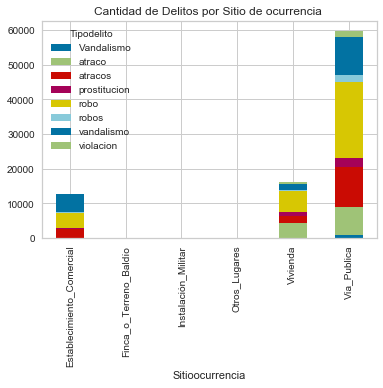

In [46]:
#Graficar por Sitio de ocurrencia


df_plot = df.groupby(['Sitioocurrencia', 
                      'Tipodelito']).size().reset_index().pivot(columns='Tipodelito', 
                                                                 index='Sitioocurrencia', values=0)

df_plot.plot(kind='bar', stacked=True).set_title('Cantidad de Delitos por Sitio de ocurrencia ')


#### Revisar Sexovictima

In [47]:
#Verificar el Sexovictima
df[['Sexovictima']].groupby('Sexovictima').size()

Sexovictima
Hombre             74647
Mujer               4251
Sin información     7692
mujer               2156
dtype: int64

In [48]:
#Reemplazar Sexovictima con su valor correcto
df['Sexovictima'] = df['Sexovictima'].replace({'mujer':'Mujer'})

#### Revisar nacionalidadvictima

In [49]:
#Verificar la nacionalidadvictima
df[['Nacionalidadvictima']].groupby('Nacionalidadvictima').size()

Nacionalidadvictima
Extranjero       1592
dominicano/a    86166
extranjero        988
dtype: int64

In [50]:
#Reemplazar la nacionalidad.
df['Nacionalidadvictima'] = df['Nacionalidadvictima'].replace({'extranjero':'Extranjero',
                                                               'dominicano/a':'Dominicana'})

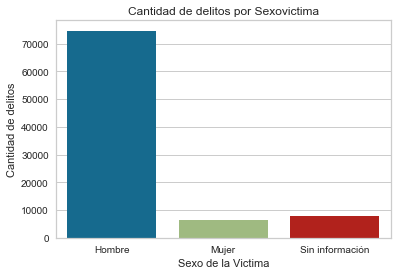

In [51]:
#Graficar por sexo de la Sexovictima
ax = sns.countplot(x='Sexovictima', data=df)
ax.set(ylabel='Cantidad de delitos',
       xlabel='Sexo de la Victima',
       title ='Cantidad de delitos por Sexovictima') 
plt.show()

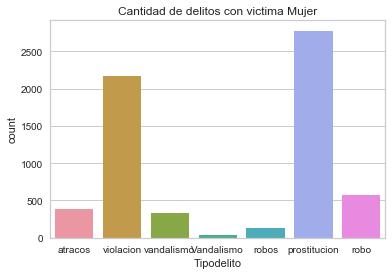

In [52]:
#Graficar por sexo de la Sexovictima
sns.countplot(x='Tipodelito', data=df[df.Sexovictima=='Mujer']).set_title("Cantidad de delitos con victima Mujer")
plt.show()

#### Revisar Sexovictimario


In [53]:
#Verificar la nacionalidadvictima
df[['Sexovictimario']].groupby('Sexovictimario').size()

Sexovictimario
Hombre    88494
Mujer       252
dtype: int64

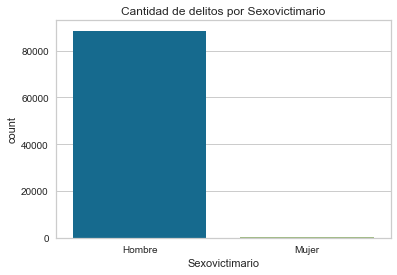

In [54]:
#Graficar por sexo del victimario
sns.countplot(x='Sexovictimario', data=df).set_title("Cantidad de delitos por Sexovictimario")
plt.show()

#### Tipo de delito


In [55]:
#Identificar los distintos tipos de delitos.
df['Tipodelito'].unique()

array(['atracos', 'vandalismo', 'robos', 'violacion', 'Vandalismo',
       'robo', 'prostitucion', 'atraco'], dtype=object)

In [56]:
#Agrupar los tipos que significar un mismo tipo de delito.
df['Tipodelito'] = df['Tipodelito'].replace({"robo":"Robos","vandalismo":"Vandalismo",
                                             "atraco":"Atracos"})
df['Tipodelito'] =df['Tipodelito'].apply(lambda x: x.upper())

In [57]:
#Verificar como quedo luego del proceso.
df['Tipodelito'].unique()

array(['ATRACOS', 'VANDALISMO', 'ROBOS', 'VIOLACION', 'PROSTITUCION'],
      dtype=object)

In [58]:
#Verificar la nacionalidadvictima
df[['Tipodelito']].groupby('Tipodelito').size()

Tipodelito
ATRACOS         28737
PROSTITUCION     3768
ROBOS           35030
VANDALISMO      18968
VIOLACION        2243
dtype: int64

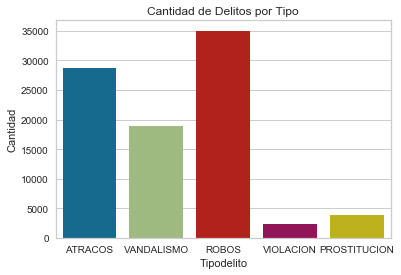

In [59]:
#Graficar la cantidad delitos por tipo
ax = sns.countplot(x='Tipodelito', data=df)
ax.set(ylabel='Cantidad',title="Cantidad de Delitos por Tipo")
plt.show()

Text(0.5, 1.0, 'Cantidad de Delitos por Tipo y Sexo de la victima ')

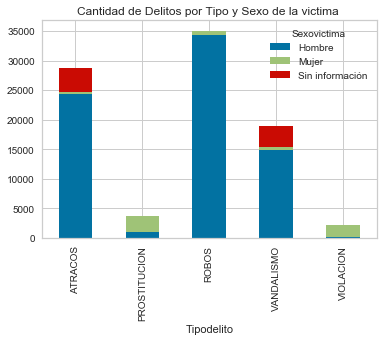

In [60]:
df_plot = df.groupby(['Tipodelito', 
                      'Sexovictima']).size().reset_index().pivot(columns='Sexovictima', 
                                                                 index='Tipodelito', values=0)

df_plot.plot(kind='bar', stacked=True).set_title('Cantidad de Delitos por Tipo y Sexo de la victima ')

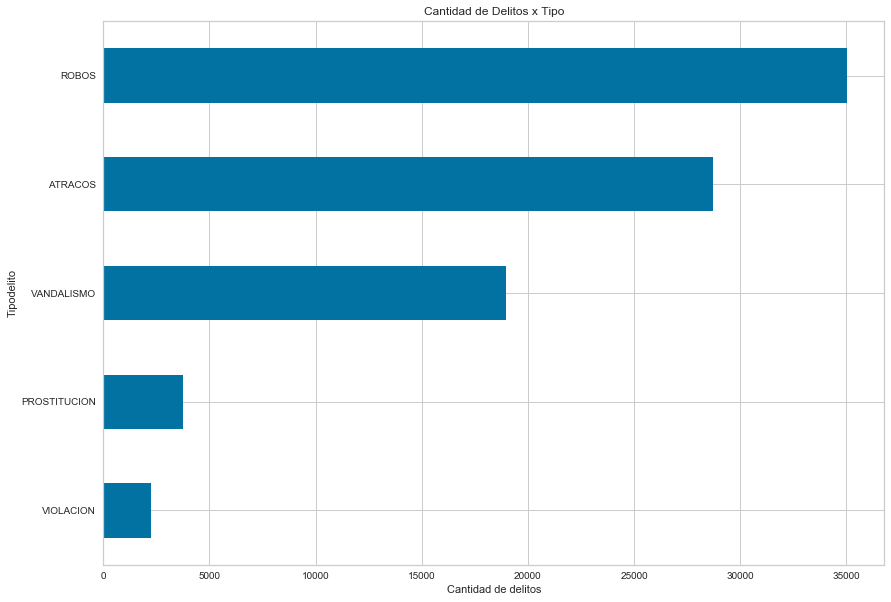

In [62]:
#Graficar los tipos de delitos x Sexo de la Victima
plt.figure(figsize=(14,10))
plt.title('Cantidad de Delitos x Tipo')
plt.ylabel('Tipo')
plt.xlabel('Cantidad de delitos')

df.groupby([df['Tipodelito']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

## Creación de nueva columnas

#### Crear una columna para identificar Madrugada 0-6, Mañana 6-12,Tarde 12-18,Noche 18-24

In [20]:
#Horas de la noche
df['Tanda']= df['Hora'].map({'00:01-02:00':'Madrugada',
                             '02:01-04:00':'Madrugada',
                             '04:01-06:00':'Madrugada',
                             '06:01-08:00':'Mañana',
                             '08:01-10:00':'Mañana',
                             '10:01-12:00':'Mañana',
                             '12:01-14:00':'Tarde',
                             '14:01-16:00':'Tarde',
                             '16:01-18:00':'Tarde',
                             '18:01-20:00':'Noche',
                             '20:01-22:00':'Noche',
                             '22:01-24:00':'Noche'})

In [21]:
#Borrar la columna 'Hora' ya que mas adelante dummificaremos solo la TANDA
df = df.drop('Hora',axis=1)

df.head()


,Dia,NombreDia,Mes,Anio,Provincia,Municipio,Distrito,Barrio,Zona,Sitioocurrencia,Sexovictima,Edadvictima,Nacionalidadvictima,Tipodelito,Sexovictimario,Weekend,Tanda
0,13,Lunes,Junio,2016,Distrito Nacional,Santo Domingo de Guzmán,Santo Domingo de Guzmán,Los Ríos,Urbana,Vivienda / domicilio o residencia y sus parqueos,Hombre,56,extranjero,atracos,Hombre,No,Madrugada
1,9,Viernes,Diciembre,2011,Santo Domingo,Santo Domingo Este,Santo Domingo Este,Alma Rosa,Urbana,Vía pública / parque / interior de vehículo,Hombre,48,extranjero,atracos,Hombre,Si,Noche
2,10,Domingo,Octubre,2010,Santo Domingo,Pedro Brand,La Guáyiga,Yacó,Rural,Vía pública / parque / interior de vehículo,Hombre,58,extranjero,atracos,Hombre,Si,Tarde
3,1,Domingo,Enero,2017,Distrito Nacional,Santo Domingo de Guzmán,Santo Domingo de Guzmán,San Carlos,Urbana,Vía pública / parque / interior de vehículo,Hombre,Sin información,extranjero,vandalismo,Hombre,Si,Noche
4,14,Lunes,Octubre,2013,Distrito Nacional,Santo Domingo de Guzmán,Santo Domingo de Guzmán,Bella Vista,Urbana,Negocio / comercio / mercado / hostelería / af...,Hombre,44,extranjero,robos,Hombre,No,Noche


[Text(0, 0.5, 'Cantidad de delitos'), Text(0.5, 0, 'Tipo de delito')]

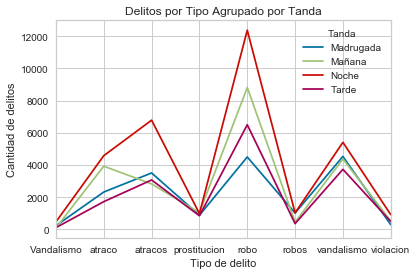

In [22]:
#Graficar Delitos por Tipo Agrupado por la Tanda en que ocurrieron
df_plot = df.groupby(['Tipodelito', 
                      'Tanda']).size().reset_index().pivot(columns='Tanda', 
                                                                 index='Tipodelito', values=0)

ax =df_plot.plot(kind='line'
                 ,title='Delitos por Tipo Agrupado por Tanda')
ax.set(ylabel='Cantidad de delitos', xlabel='Tipo de delito') 

#### Crear una columna para identificar fines de semana

In [15]:
#Crear columna temporal para posteriormente identificar fin de semana.
df['dow'] =df['NombreDia'].map({'Domingo':1,'Lunes':2, 'Martes':3, 
                                'Miércoles':4,  'Jueves':5,'Viernes':6, 'Sábado':7})
#Fin de Semana
df['Weekend']= df['dow'].apply(lambda x: 'Si' if (x==1 or x==6 or x==7 ) else 'No' )

#Borrar la columna temporal 'dow'
df = df.drop('dow',axis=1)

In [16]:
#Mostrar como quedo la columna
df[[ 'NombreDia','Weekend']].head()

,NombreDia,Weekend
0,Lunes,No
1,Viernes,Si
2,Domingo,Si
3,Domingo,Si
4,Lunes,No


[Text(0, 0.5, 'Cantidad de delitos'), Text(0.5, 0, 'Tipo de delito')]

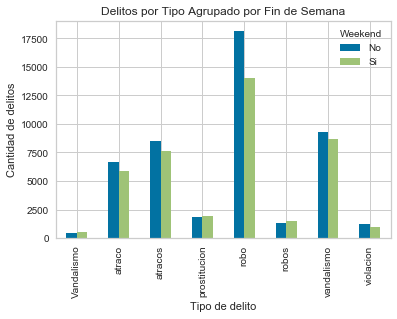

In [17]:
#Graficar Delitos por Tipo Agrupado por Fin de Semana
df_plot = df.groupby(['Tipodelito', 
                      'Weekend']).size().reset_index().pivot(columns='Weekend', 
                                                                 index='Tipodelito', values=0)

ax =df_plot.plot(kind='bar'
                 ,title='Delitos por Tipo Agrupado por Fin de Semana')
ax.set(ylabel='Cantidad de delitos', xlabel='Tipo de delito') 

### 3.4 Guardar data procesada luego de todos los arreglos

In [ ]:
#Guardar data procesada para no tener que recorrer todo el proceso anterior.
df.to_excel('Datalimpia.xlsx',index=False)

## 4. Preprocesamiento

A continuación se procede con el Preprocesamiento de los datos. En primer lugar, haremos un ```one hot encoding``` sobre algunas variables, considerándolas para el modelo. Esto lo conseguimos con la función ```get_dummies```de la librería de ```pandas```.  


In [63]:
#La neural network no aprende porque lo registro de violacion son muy pocos, mejor remover.
df=df[df.Municipio != 'VIOLACION']

In [64]:
#Agregar Variables Dummi en la data a entrenar
dftrain = pd.get_dummies(df, columns=['NombreDia', 
                                      'Mes',  
                                      'Tanda', 
                                      'Weekend', 
                                      'Sitioocurrencia',
                                      'Zona', 
                                      'Sexovictima', 
                                      'Sexovictimario']) 

In [65]:
#Quitar las columnas que no se utilizan
dftrain = dftrain.drop(['Municipio','Distrito','Barrio','Nacionalidadvictima','Direccion'],axis=1)

dftrain.head()

,Dia,Anio,Tipodelito,NombreDia_Domingo,NombreDia_Jueves,NombreDia_Lunes,NombreDia_Martes,NombreDia_Miércoles,NombreDia_Sábado,NombreDia_Viernes,...,Sitioocurrencia_Otros_Lugares,Sitioocurrencia_Vivienda,Sitioocurrencia_Vía_Publica,Zona_Rural,Zona_Urbana,Sexovictima_Hombre,Sexovictima_Mujer,Sexovictima_Sin información,Sexovictimario_Hombre,Sexovictimario_Mujer
0,13,2016,ATRACOS,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
1,9,2011,ATRACOS,0,0,0,0,0,0,1,...,0,0,1,0,1,1,0,0,1,0
2,10,2010,ATRACOS,1,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
3,1,2017,VANDALISMO,1,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
4,14,2013,ROBOS,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [66]:
print (list(dftrain.columns))

['Dia', 'Anio', 'Tipodelito', 'NombreDia_Domingo', 'NombreDia_Jueves', 'NombreDia_Lunes', 'NombreDia_Martes', 'NombreDia_Miércoles', 'NombreDia_Sábado', 'NombreDia_Viernes', 'Mes_Abril', 'Mes_Agosto', 'Mes_Diciembre', 'Mes_Enero', 'Mes_Febrero', 'Mes_Julio', 'Mes_Junio', 'Mes_Marzo', 'Mes_Mayo', 'Mes_Noviembre', 'Mes_Octubre', 'Mes_Septiembre', 'Tanda_Madrugada', 'Tanda_Mañana', 'Tanda_Noche', 'Tanda_Tarde', 'Weekend_No', 'Weekend_Si', 'Sitioocurrencia_Establecimiento_Comercial', 'Sitioocurrencia_Finca_o_Terreno_Baldío', 'Sitioocurrencia_Instalación_Militar', 'Sitioocurrencia_Otros_Lugares', 'Sitioocurrencia_Vivienda', 'Sitioocurrencia_Vía_Publica', 'Zona_Rural', 'Zona_Urbana', 'Sexovictima_Hombre', 'Sexovictima_Mujer', 'Sexovictima_Sin información', 'Sexovictimario_Hombre', 'Sexovictimario_Mujer']


In [67]:
#Tenemos 7 Tipos de delitos
Classes = dftrain['Tipodelito'].unique()
Classes

array(['ATRACOS', 'VANDALISMO', 'ROBOS', 'VIOLACION', 'PROSTITUCION'],
      dtype=object)

In [68]:
#Convertir la variable tipo delito a Categorica.
dftrain['Tipodelito'] = pd.factorize(dftrain['Tipodelito'])[0]
dftrain['Tipodelito'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

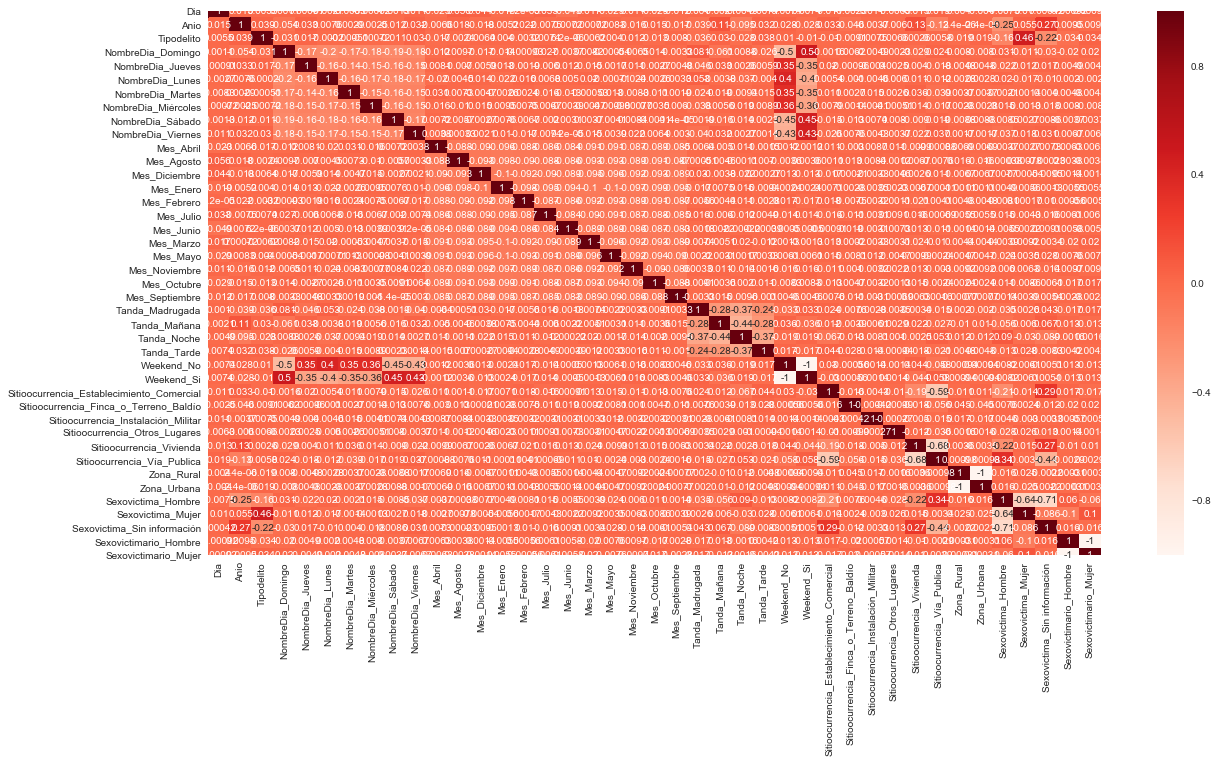

In [69]:
#Usando la correlación de Pearson
plt.figure(figsize=(20,10))
cor = dftrain.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [70]:
#Correlation with output variable
cor_target = abs(cor['Tipodelito'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

Anio                                         0.038858
Tipodelito                                   1.000000
NombreDia_Domingo                            0.030832
NombreDia_Jueves                             0.017077
NombreDia_Sábado                             0.011012
NombreDia_Viernes                            0.030285
Mes_Abril                                    0.016650
Mes_Noviembre                                0.011712
Mes_Octubre                                  0.013125
Tanda_Madrugada                              0.036185
Tanda_Mañana                                 0.029736
Tanda_Noche                                  0.027893
Tanda_Tarde                                  0.038037
Weekend_No                                   0.010387
Weekend_Si                                   0.010387
Sitioocurrencia_Establecimiento_Comercial    0.010322
Zona_Rural                                   0.019199
Zona_Urbana                                  0.019199
Sexovictima_Hombre          

In [71]:
print (list(dftrain.columns))

['Dia', 'Anio', 'Tipodelito', 'NombreDia_Domingo', 'NombreDia_Jueves', 'NombreDia_Lunes', 'NombreDia_Martes', 'NombreDia_Miércoles', 'NombreDia_Sábado', 'NombreDia_Viernes', 'Mes_Abril', 'Mes_Agosto', 'Mes_Diciembre', 'Mes_Enero', 'Mes_Febrero', 'Mes_Julio', 'Mes_Junio', 'Mes_Marzo', 'Mes_Mayo', 'Mes_Noviembre', 'Mes_Octubre', 'Mes_Septiembre', 'Tanda_Madrugada', 'Tanda_Mañana', 'Tanda_Noche', 'Tanda_Tarde', 'Weekend_No', 'Weekend_Si', 'Sitioocurrencia_Establecimiento_Comercial', 'Sitioocurrencia_Finca_o_Terreno_Baldío', 'Sitioocurrencia_Instalación_Militar', 'Sitioocurrencia_Otros_Lugares', 'Sitioocurrencia_Vivienda', 'Sitioocurrencia_Vía_Publica', 'Zona_Rural', 'Zona_Urbana', 'Sexovictima_Hombre', 'Sexovictima_Mujer', 'Sexovictima_Sin información', 'Sexovictimario_Hombre', 'Sexovictimario_Mujer']


In [72]:
Target="Tipodelito"

Features=[ 'Dia', 'Anio',                                        
'NombreDia_Domingo',                           
'NombreDia_Jueves',                            
'NombreDia_Sábado',                            
'NombreDia_Viernes',                           
'Mes_Abril',                                   
'Mes_Noviembre',                               
'Mes_Octubre',                                 
'Tanda_Madrugada',                             
'Tanda_Mañana',                                
'Tanda_Noche',                                 
'Tanda_Tarde',                                 
'Weekend_No',                                  
'Weekend_Si',                                  
'Sitioocurrencia_Establecimiento_Comercial',   
'Zona_Rural',                                  
'Zona_Urbana',                                 
'Sexovictima_Hombre',                          
'Sexovictima_Mujer',                           
'Sexovictima_Sin información',              
'Sexovictimario_Hombre',                       
'Sexovictimario_Mujer']

#'nacionalidadvictima_Dominicana','nacionalidadvictima_Extranjero', 

In [73]:
#Separar el dataframe en Entrenamiento y Prueba
x, y = train_test_split(dftrain,test_size = 0.25,train_size = 0.75,random_state= 3)

x1 = x[Features]    #Caracteristicas a entrenar
x2 = x[Target]      #Variable Objetivo
y1 = y[Features]    #Caracteristicas de prueba
y2 = y[Target]      #Variable objetivo de prueba

print('Caracteristicas          : ', Features)
print('')
print('Variable Objetivo        : ', Target)
print('Tamaño de la Muestra     : ', x.shape)
print('Tamaño de la prueba      : ', y.shape)

Caracteristicas          :  ['Dia', 'Anio', 'NombreDia_Domingo', 'NombreDia_Jueves', 'NombreDia_Sábado', 'NombreDia_Viernes', 'Mes_Abril', 'Mes_Noviembre', 'Mes_Octubre', 'Tanda_Madrugada', 'Tanda_Mañana', 'Tanda_Noche', 'Tanda_Tarde', 'Weekend_No', 'Weekend_Si', 'Sitioocurrencia_Establecimiento_Comercial', 'Zona_Rural', 'Zona_Urbana', 'Sexovictima_Hombre', 'Sexovictima_Mujer', 'Sexovictima_Sin información', 'Sexovictimario_Hombre', 'Sexovictimario_Mujer']

Variable Objetivo        :  Tipodelito
Tamaño de la Muestra     :  (66559, 41)
Tamaño de la prueba      :  (22187, 41)


## 5. Entrenamiento y evaluación del modelo

En este apartado vamos a evaluar una serie de modelos

#### Funciones para Reutilizar

In [74]:
def EvaluarModelo(NombreModelo,result): 
    # Evaluación el Modelo
    ac_sc = accuracy_score(y2, result)
    rc_sc = recall_score(y2, result, average="weighted")
    pr_sc = precision_score(y2, result, average="weighted")
    f1_sc = f1_score(y2, result, average='micro')
    confusion_m = confusion_matrix(y2, result)

    print("RESULTADOS DE: %s " % NombreModelo.upper())
    print("Accuracy    : ", ac_sc)
    print("Recall      : ", rc_sc)
    print("Precision   : ", pr_sc)
    print("F1 Score    : ", f1_sc)
    print(" ")
    print("MATRIZ DE CONFUSIÓN:")
    print(" ")
    print(confusion_m)
    
def GraficarReporteClasificacion(model,result):
    # Reporte de Clasificación
    target_names = Classes
    visualizer = ClassificationReport(model, classes=target_names)
    visualizer.fit(X=x1, y=x2)     # Ajustar la data de entrenamiento 
    visualizer.score(y1, y2)       # Evaluar el modelo en la data de prueba.

    print('REPORTE DE CLASIFICACIÓN')
    print('')
    print(classification_report(y2, result, target_names=target_names))

    g = visualizer.poof()             # Dibujar y probar la data

### K-MEANS

In [ ]:
from sklearn import preprocessing
#Escalar las variables
escalado =DataFrame(preprocessing.scale(dftrain))

In [ ]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(2)
kmeans_model.fit(dftrain)

In [ ]:
clusters = dftrain.copy()
clusters['cluster'] = kmeans_model.fit_predict(escalado)

clusters

### RAMDOM FOREST


Explicacion ramdom forest

In [75]:
# Crear el Modelo
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Entrenar
rf_model.fit(X=x1,y=x2)

# Predecir
result = rf_model.predict(y[Features])

In [76]:
#Evaluar el Modelo
EvaluarModelo('Ramdom Forest',result)

RESULTADOS DE: RAMDOM FOREST 
Accuracy    :  0.6599810699959435
Recall      :  0.6599810699959435
Precision   :  0.6579980162018214
F1 Score    :  0.6599810699959435
 
MATRIZ DE CONFUSIÓN:
 
[[3562  731 2747   45   37]
 [1133 2738  823   24   35]
 [ 945  496 7308   19   38]
 [   7    4   23  442   95]
 [ 124   50   90   78  593]]


REPORTE DE CLASIFICACIÓN

              precision    recall  f1-score   support

     ATRACOS       0.62      0.50      0.55      7122
  VANDALISMO       0.68      0.58      0.62      4753
       ROBOS       0.66      0.83      0.74      8806
   VIOLACION       0.73      0.77      0.75       571
PROSTITUCION       0.74      0.63      0.68       935

    accuracy                           0.66     22187
   macro avg       0.69      0.66      0.67     22187
weighted avg       0.66      0.66      0.65     22187



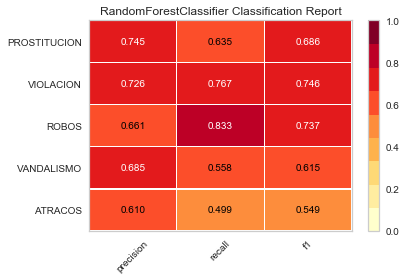

In [77]:
#Reporte de Clasificacion
GraficarReporteClasificacion(rf_model,result)

### K-NEAREST NEIGHBORS


In [ ]:
# Crear el Modelo 
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar
knn_model.fit(X=x1,y=x2)

# Predecir
result = knn_model.predict(y[Features])

In [ ]:
#Evaluar el Modelo
EvaluarModelo('K-Nearest Neighbors',result)

In [ ]:
#Reporte de Clasificacion
GraficarReporteClasificacion(knn_model,result)

### NEURAL NETWORK


A continuación probamos con las redes neuronales. Se implementa una topología como sigue:

* Capa de entrada: con tantos elementos como *features*. 
* Capa oculta: con el doble de elementos. 
* Capa de salida: una neurona. 

In [ ]:
# Crear el Modelo
#nn_model = MLPClassifier(alpha=1e-5,  
#hidden_layer_sizes=(len(Features)*2,),                          solver='lbfgs',                         max_iter=1000                                                 )
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )
# Entrenar
nn_model.fit(X=x1,y=x2)

# Predecir
result = nn_model.predict(y[Features]) 

In [ ]:
#Evaluar el Modelo
EvaluarModelo('Neural Network',result)

In [ ]:
#Reporte de Clasificacion
GraficarReporteClasificacion(nn_model,result)

### Ensemble Voting Model

In [ ]:
# Combirnar los 3 modelos para crear el ENSEMBLE MODEL

# Crear el Modelo
evm_model = VotingClassifier(estimators=[('knn', knn_model), 
                        ('rf', rf_model), ('nn', nn_model)], 
                         weights=[1,1,1],
                         flatten_transform=True)

#Entrenar
evm_model.fit(X=x1, y=x2)   

# Predecir
result = evm_model.predict(y[Features])

In [ ]:
#Evaluar el Modelo
EvaluarModelo('Ensemble Voting Model',result)

In [ ]:
#Reporte de Clasificacion
GraficarReporteClasificacion(evm_model,result)